## Reading and preparing data

In [321]:
import pandas as pd #A
import numpy as np #B
from matplotlib import pyplot as plt #C
import seaborn as sns #C
%matplotlib inline #D
#A Import NumPy: a library for numerical operations
#B Import Pandas: a library for tabular data
#C Import plotting libraries: matplotlib and seaborn
#D Make sure that plots are rendered correctly in jupyter notebooks.

UsageError: unrecognized arguments: #D


In [322]:
df = pd.read_csv('common_clear.csv')

In [323]:
len(df)
#length of dataset

959

In [324]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,is_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,1


In [325]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [326]:
#splitting data set in to categorical and numerical
num_data = df.select_dtypes(include=[np.number],exclude=['object']).copy()
cat_data = df.select_dtypes(include=['object'],exclude=[np.number]).copy()
#getting numerical and cateorical headers
num_headers=[]
for col in num_data.columns:
    num_headers.append(col)
cat_headers=[]
for col in cat_data.columns:
    cat_headers.append(col)

In [327]:
#encode categorical values
# create dictionary of ordinal to integer mapping
#defined field names
cat_dataReplace = cat_data.copy()
replace_map_comp_dict={}
cat_headers_num=[]
for col in cat_data.columns:
    cat_headers_num.append(col)
for name in cat_headers:
    labels = cat_data[name].astype('category').cat.categories.tolist()
    replace_map_comp = {name : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
    cat_dataReplace.replace(replace_map_comp, inplace=True)
    replace_map_comp_dict[name] = replace_map_comp
#Print dictinary for cat values
replace_map_comp_dict

{'school': {'school': {'GP': 1, 'MS': 2}},
 'sex': {'sex': {'F': 1, 'M': 2}},
 'address': {'address': {'R': 1, 'U': 2}},
 'famsize': {'famsize': {'GT3': 1, 'LE3': 2}},
 'pstatus': {'pstatus': {'A': 1, 'T': 2}},
 'mjob': {'mjob': {'at_home': 1,
   'health': 2,
   'other': 3,
   'services': 4,
   'teacher': 5}},
 'fjob': {'fjob': {'at_home': 1,
   'health': 2,
   'other': 3,
   'services': 4,
   'teacher': 5}},
 'reason': {'reason': {'course': 1, 'home': 2, 'other': 3, 'reputation': 4}},
 'guardian': {'guardian': {'father': 1, 'mother': 2, 'other': 3}},
 'schoolsup': {'schoolsup': {'no': 1, 'yes': 2}},
 'famsup': {'famsup': {'no': 1, 'yes': 2}},
 'paid': {'paid': {'no': 1, 'yes': 2}},
 'activities': {'activities': {'no': 1, 'yes': 2}},
 'nursery': {'nursery': {'no': 1, 'yes': 2}},
 'higher': {'higher': {'no': 1, 'yes': 2}},
 'internet': {'internet': {'no': 1, 'yes': 2}},
 'romantic': {'romantic': {'no': 1, 'yes': 2}}}

In [328]:
#merge cat and num values
df_merged = pd.concat([cat_dataReplace, num_data],axis=1)
df_merged.head()

,school,sex,address,famsize,pstatus,mjob,fjob,reason,guardian,schoolsup,...,freetime,goout,dalc,walc,health,absences,g1,g2,g3,is_por
0,1,1,2,1,1,1,5,1,2,2,...,3,4,1,1,3,4,0,11,11,1
1,1,1,2,1,2,1,3,1,1,1,...,3,3,1,1,3,2,9,11,11,1
2,1,1,2,2,2,1,3,3,2,2,...,3,2,2,3,3,6,12,13,12,1
3,1,1,2,1,2,2,4,2,2,1,...,2,2,1,1,5,0,14,14,14,1
4,1,1,2,1,2,3,3,2,1,1,...,3,2,1,2,5,0,11,13,13,1


In [329]:
#df_merged.columns = df_merged.columns.str.lower().str.replace(' ', '_') # A
#string_columns = list(df_merged.dtypes[df.dtypes == 'object'].index) # B
#for col in string_columns:
#    df_merged[col] = df_merged[col].str.lower().str.replace(' ', '_') # C
#A Lowercase all the column names, and replace spaces with underscores.
#B Select only columns with string values.
#C Lowercase and replace spaces with underscores for values in all string columns of the dataframe.
#After this initial preprocessing, the dataframe looks more uniform

In [330]:
# getting headers, iterating the columns
headers=[]
for col in df_merged.columns:
    headers.append(col)
print(headers)

['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'dalc', 'walc', 'health', 'absences', 'g1', 'g2', 'g3', 'is_por']


## Target variable analysis

<AxesSubplot:xlabel='g3', ylabel='Count'>

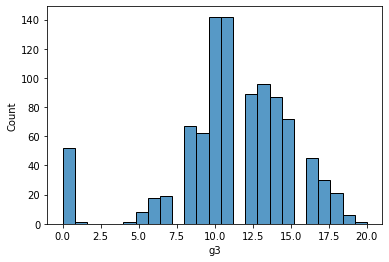

In [331]:
sns.histplot(df_merged.g3, kde=False)
#One of the first steps of exploratory data analysis should always be to look at what the
#values of y look like. We typically do this by checking the distribution of y: a visual description
#of what the possible values of y can be and how often they occur. This type of visualization is
#called a histogram.

C:\Users\Tanya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='g3'>

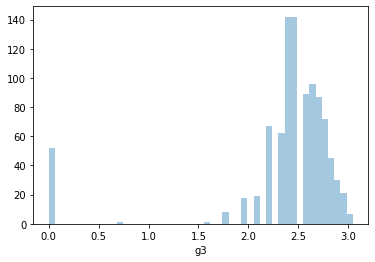

In [332]:
#The +1 part is important in cases that have zeros. The logarithm of zero is minus infinity, but
#the logarithm of one is zero. If our values are all non-negative, by adding 1, we make sure
#that the transformed values do not go below zero.
#NumPy has a function that performs this
#transformation:
log_price = np.log1p(df_merged.g3)
sns.distplot(log_price, kde=False)

In [333]:
#Generally, it’s good when the target distribution looks like the normal distribution. Under
#this condition, models such as linear regression perform well.

In [334]:
#check for missing values in the data. This step is important because typically, machine learning
#models cannot deal with missing values automatically. We need to know whether we need to
#do anything special to handle those values.

In [335]:
df_merged.isnull().sum()

school        0
sex           0
address       0
famsize       0
pstatus       0
mjob          0
fjob          0
reason        0
guardian      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
age           0
medu          0
fedu          0
traveltime    0
studytime     0
failures      0
famrel        0
freetime      0
goout         0
dalc          0
walc          0
health        0
absences      0
g1            0
g2            0
g3            0
is_por        0
dtype: int64

In [336]:
#We see that all features and target variable doesn't have missed values.

## Validation framework (splitting dataset)

In [337]:
#Let’s split the dataframe such that:
#• 20% of data goes to validation,
#• 20% goes to test, and
#• the remaining 60% goes to train.

In [338]:
n = len(df_merged) #A
n_val = int(0.2 * n) #B
n_test = int(0.2 * n) #B
n_train = n - (n_val + n_test) #B
np.random.seed(3) #C
idx = np.arange(n) #D
np.random.shuffle(idx) #D
df_shuffled = df_merged.iloc[idx] #E
df_train = df_shuffled.iloc[:n_train].copy() #F
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy() #F
df_test = df_shuffled.iloc[n_train+n_val:].copy() #F
#A Get the number of rows in the dataframe.
#B Calculate how many rows should go to train, validation, and test.
#C Fix the random seed to make sure that the results are reproducible.
#D Create a NumPy array with indices from 0 to (n-1) and shuffle it.
#E Use the array with indices to get a shuffled dataframe.
#F Split the shuffled dataframe into train, validation, and test.

In [339]:
#Now the dataframe is split into three parts, and we can continue. Our initial analysis showed a
#long tail in the distribution of prices, and to remove its effect, we need to apply the log
#transformation. We can do that for each dataframe separately:
y_train = np.log1p(df_train.g3.values)
y_val = np.log1p(df_val.g3.values)
y_test = np.log1p(df_test.g3.values)

In [340]:
#To avoid accidentally using the target variable later, let’s remove it from the dataframes:
del df_train['g3']
del df_val['g3']
del df_test['g3']

## Linear regression theory

In [341]:
#The weights from data: we use the target variable y to find such w that combines
#the features of X in the best possible way. “Best possible” in the case of linear regression
#means that it minimizes the error between the predictions g(X) and the actual target y.
#There are multiple ways to do that. We will use normal equation, which is the simplest
#method to implement. The weight vector 𝑤 can be computed with the following formula:
#inv(X.T.dot(X)).dot(X.T).dot(y)

In [342]:
#To implement the normal equation, we need to do the following:
#1. Create a function that takes in a matrix X with features and a vector y with the target.
#2. Add a dummy column (the feature that is always set to 1) to the matrix X.
#3. Train the model: compute the weights w by using the normal equation.
#4. Split this w into the bias w0 and the rest of the weights, and return them.
#The last step — splitting w into the bias term and the rest — is optional and mostly for
#convenience; otherwise, we need to add the dummy column every time we want to make
#predictions instead of doing it once during training.
#Let’s implement it.

In [343]:
def linear_regression(X, y):
    # adding the dummy column
    ones = np.ones(X.shape[0]) # A
    X = np.column_stack([ones, X]) # B
    # normal equation formula
    XTX = X.T.dot(X) # C
    XTX_inv = np.linalg.inv(XTX) # D
    w = XTX_inv.dot(X.T).dot(y) # E
    return w[0], w[1:] # F
#A Create an array that contains only 1s.
#B Add the array of 1s as the first column of X.
#C Compute XTX.
#D Compute the inverse of XTX.
#E Compute the rest of the normal equation.
#F Split the weights vector into the bias and the rest of the weights.

## Predicting final grade (g3)

In [344]:
num_headers

['age',
 'medu',
 'fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'dalc',
 'walc',
 'health',
 'absences',
 'g1',
 'g2',
 'g3',
 'is_por']

In [345]:
num_headers.remove('g3')

In [346]:
base = num_headers
df_num = df_train[base]
df_num = df_num.fillna(0)

In [347]:
num_headers

['age',
 'medu',
 'fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'dalc',
 'walc',
 'health',
 'absences',
 'g1',
 'g2',
 'is_por']

In [348]:
X_train = df_num.values
w_0, w = linear_regression(X_train, y_train)

In [349]:
y_pred = w_0 + X_train.dot(w)

C:\Users\Tanya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


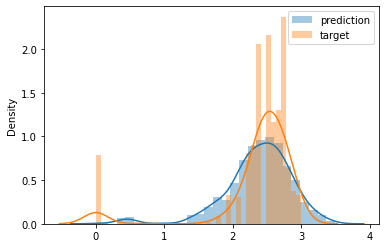

In [350]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='target')
plt.legend()

 ## RMSE: evaluating model quality (root mean squared error)

In [351]:
def rmse(y, y_pred):
    error = y_pred - y # A
    mse = (error ** 2).mean() # B
    return np.sqrt(mse) # C
#A Compute the difference between the prediction and the target.
#B Compute MSE: first compute the squared error and then calculate its mean.
#C Take the square root to get RMSE.

## Validating the model

In [352]:
#let's get rid of duplicate in sets preparation
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [353]:
#Now the whole training and evaluation becomes simpler and looks like this:
X_train = prepare_X(df_train) #A
w_0, w = linear_regression(X_train, y_train) #A
X_val = prepare_X(df_val) #B
y_pred = w_0 + X_val.dot(w) #B
print('validation:', rmse(y_val, y_pred)) #C
#A Train the model
#B Apply the model to the validation dataset
#C Compute RMSE on the validation data

validation: 0.4235758015177759


## Simple feature engineering

In [354]:
#let's get rid of duplicate in sets preparation
def prepare_X(df_merged):
    df = df_merged.copy() # A
    features = base.copy() # B
 # D
    features.append('reason')
    features.append('schoolsup')
    features.append('romantic')
    features.append('nursery')
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [355]:
X_train = prepare_X(df_train)
w_0, w = linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 0.4260897076785727


C:\Users\Tanya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tanya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


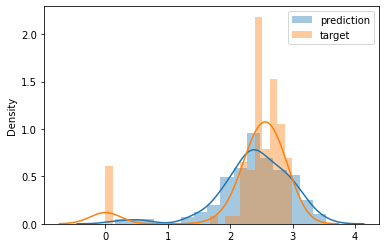

In [356]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_val, label='target')
plt.legend()

In [357]:
#Instead of helping, the new features didn't channged a score. 

## Regularization

In [358]:
#We saw that adding new features does not always help, and in our case, it made things a lot
#worse. The reason for this behavior is numerical instability.
#Sometimes, when adding new columns to X, we can
#accidentally add a column that is a combination of other columns. For example, if we already
#have the mpg in the city feature and decide to add kilometers per liter in the city, the second
#feature is the same as the first one but multiplied by a constant.
#When this happens, XTX becomes undetermined or singular, which means that it’s not
#possible to find an inverse for this matrix. If we try to invert a singular matrix, NumPy will tell
#us about that by raising a LinAlgError.
#In numerical linear algebra, such issues are called numerical instability issues, and they
#are typically solved with regularization techniques. The aim of regularization is to make sure
#that the inverse exists by forcing the matrix to be invertible. Regularization is an important
#concept in machine learning: it means “controlling” — controlling the weights of the model so
#that they behave correctly and don’t grow too large, as in our case.
#Regularized linear regression is often called ridge regression. Many libraries, including scikit-learn, use
#ridge to refer to regularized linear regression and linear regression to refer to the unregularized model.

In [359]:
#Let’s create a new function that uses this idea and implements linear regression with regularization.

In [360]:
def linear_regression_reg(X, y, r=0.0): #A
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0]) #B
    XTX = XTX + reg #B
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]
#A Control the amount of regularization by using the parameter r.
#B Add r to the main diagonal of XTX.

In [361]:
X_train = prepare_X(df_train)
w_0, w = linear_regression_reg(X_train, y_train, r=0.001)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 0.42608840985568874


In [362]:
X_train = prepare_X(df_train)
w_0, w = linear_regression_reg(X_train, y_train, r=0.01)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))
X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.42607692280076187
test: 0.37056590516584653


In [363]:
pwd

'C:\\Users\\Tanya\\TPU'